<a href="https://colab.research.google.com/github/otaviofernandes/Algebra_Linear/blob/main/AC5_%C3%81lgebra_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AC 5 - Álgebra Linear

## Equipe:

- Deborah Yamazaki Hukuda.............RA: 1905373
- Flávia Tamie Hajime........................RA: 1905355
- Gabriel da Silva Lima.......................RA: 1905064
- Otavio de Almeida Fernandes.........RA: 1901796
- Vinicius Veloso dos Santos.............RA: 1905107

In [ ]:
import numpy as np
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
%matplotlib inline

# Questão 1: $(3,0 \; pontos)$

Elabore uma animação que simule o lançamento inclinado de um bloco retangular. Assuma que o ângulo de lançamento é 40° (quarenta graus).

A animação deve ser limitada a 10 segundos e o movimento do bloco deve ser limitado em $x \in [-10,10]$ e $y \in [0, 10]$.

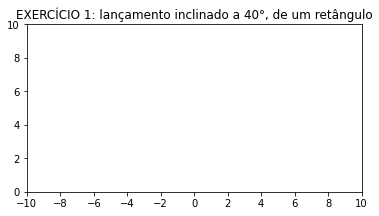

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim ((-10, 10))
ax.set_ylim ((0, 10))
ax.set_xticks([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])
ax.set_yticks([0, 2, 4, 6, 8, 10])
ax.set_title("EXERCÍCIO 1: lançamento inclinado a 40°, de um retângulo")

#retângulo inicialmente inclinado em 40°
retangulo = np.array([[0, 0, 1],
                      [np.cos(np.deg2rad(40)), np.sin(np.deg2rad(40)), 1],
                      [np.cos(np.deg2rad(130))/2 + np.cos(np.deg2rad(40)), np.sin(np.deg2rad(130))/2 + np.sin(np.deg2rad(40)), 1],
                      [np.cos(np.deg2rad(130))/2, np.sin(np.deg2rad(130))/2, 1],
                      [0, 0, 1]])

line, = ax.plot([], [])

In [ ]:
def init():
  x = retangulo[:, 0]
  y  = retangulo[:,1]
  
  line.set_data(x, y)
  line.set_color('red')
  return (line,)

In [ ]:
def animate(i):
   #variáveis auxíliares do movimento
   aux = 1 - i
   d = i * (1 / 50)
   
   '''descrição da parábola com limites em xi, xf = -10, 10 e ângulo de
   lançamento de 40°'''

   y_v = 4.45
   x_v =  0
   a = 0.0445
   x_total = np.linspace(-10, 10, 200)
   y_total = -a * (x_total - x_v)**2 + y_v
   x1 = x_total[i]
   y1 = y_total[i]  
   
   #operação de rotação do retângulo
   ang = aux*0.00012
   rotacao = np.array([[np.cos(np.rad2deg(ang)), np.sin(np.rad2deg(ang)), 0],
                   [-np.sin(np.rad2deg(ang)), np.cos(np.rad2deg(ang)), 0],
                   [0, 0, 1]]) 
   retangulo_r = np.matmul(retangulo, rotacao)   
   
   #operação de translação do retângulo segundo a parábola
   translacao = np.array([[x1, y1, 0],
                          [x1, y1, 0],
                          [x1, y1, 0],
                          [x1, y1, 0],
                          [x1, y1, 0]])
   retangulo_i = retangulo_r + translacao
   
   #resultado final para plotagem
   x = retangulo_i[:,0]
   y = retangulo_i[:,1]
   
   line.set_data(x, y)
   return (line, )

In [ ]:
anim = FuncAnimation(fig, animate, init_func=init,
                     frames=200, interval=50, blit=True)

In [ ]:
HTML(anim.to_html5_video())

# Questão 2: $(3,0 \; pontos)$

Elabore uma animação de uma roda que gira enquanto se desloca ao longo de uma superfície horizontal.

O movimento da roda deve ser preparado de modo a não haver "derrapagens", ou seja, a roda não pode "escorregar" sobre a superfície.

A animação deve ser limitada a 20 segundos, dentro dos quais a roda deve fazer 4 ou mais voltas completas. A animação também deve simular um fluxo infinito em que a última imagem é igual à primeira.

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim ((1, 42))
ax.set_ylim ((-3, 5))
ax.set_xticks([np.pi*2, np.pi*4, np.pi*6, np.pi*8, np.pi*10, np.pi*12])
ax.set_yticks([])
ax.set_title("EXERCÍCIO 2: roda com raio = 1, movimento sobre superfície plana")
ax.set_xlabel("Múltiplos de 2*pi- deslocamento feito a cada volta da roda com raio = 1")

linha1 = np.array([[-1, -0.01, 1],
                  [1, -0.01, 1],
                  [1, 0.01, 1],
                  [-1, 0.01, 1],
                  [-1, -0.01, 1]])

linha2 = np.array([[-0.01, -1, 1],
                  [0.01, -1, 1],
                  [0.01, 1, 1],
                  [-0.01, 1, 1],
                  [-0.01, -1, 1]])

t1 = np.linspace(0, 2*np.pi, 100)
r1 = 1
xc1, yc1 = 0, 0
xr1 = r1 * np.cos(t1) + xc1
yr1 = r1 * np.sin(t1) + yc1

roda = np.array([xr1, yr1, np.ones(100)]).T

chao = np.array([[1, -1.2],
                 [42, -1.2]])

line1, = ax.plot([], [])
line2, = ax.plot([], [])
line3, = ax.plot([], [])
line4, = ax.plot([], [])

In [ ]:
def init():
  x = linha1[:, 0]
  y  = linha1[:,1]

  xv = linha2[:, 0]
  yv  = linha2[:,1]

  xr = roda[:, 0]
  yr = roda[:, 1]

  xc = chao[:, 0]
  yc = chao[:, 1]
  
  line1.set_data(x, y)
  line2.set_data(xv, yv)
  line3.set_data(xr, yr)
  line4.set_data(xc, yc)

  line1.set_color('red')
  line2.set_color('red')
  line3.set_color('black')
  line4.set_color('green')

  return (line1, line2, line3, line4)

In [ ]:
def animate(i):
   aux = 1 - i
   aux2 = i*0.22
   ang = aux*0.0039
   rotacao = np.array([[np.cos(np.rad2deg(ang)), np.sin(np.rad2deg(ang)), 0],
                   [-np.sin(np.rad2deg(ang)), np.cos(np.rad2deg(ang)), 0],
                   [0, 0, 1]]) 
  
   translacao = np.array([[1, 0, 0],
                           [0, 1, 0],
                           [aux2, 0, 1]])

   linha_h = np.matmul(np.matmul(linha1, rotacao), translacao)
   linha_v = np.matmul(np.matmul(linha2, rotacao), translacao)
   roda_f = np.matmul(roda, translacao)
   
   x = linha_h[:,0]
   y = linha_h[:,1]

   xv = linha_v[:,0]
   yv = linha_v[:,1]

   xrf = roda_f[:,0]
   yrf = roda_f[:,1]

   line1.set_data(x, y)
   line2.set_data(xv, yv)
   line3.set_data(xrf, yrf)

   return (line1, line2, line3)

In [ ]:
anim = FuncAnimation(fig, animate, init_func=init,
                     frames=200, interval=100, blit=True)

In [ ]:
HTML(anim.to_html5_video())

# Questão 3: $(4,0 \; pontos)$

Elabore uma animação de tema livre, a qual apresente um significado claro sobre do que se trata.

A animação deverá obrigatoriamente apresentar 2 ou mais transformações geométricas: translação, escalonamento e rotação.

A animação deverá apresentar de 10 a 20 segundos.

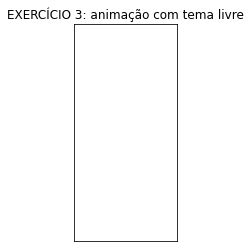

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim ((-10, 10))
ax.set_ylim ((-3, 39))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("EXERCÍCIO 3: animação com tema livre")

chao = np.array([[-13, 0, 1],
                 [13, 0, 1]])

p1 = np.array([[-4, 8, 1],
               [-3.5, 9, 1],
               [-3, 9.5, 1],
               [-2.5, 9, 1],
               [-2, 8, 1],
               [-4, 8, 1]])

t = np.linspace(0, 2*np.pi, 9)
r = 0.5
xc1, yc1 = -3, 6
x = r * np.cos(t) + xc1
y = r * np.sin(t) + yc1
p2 = np.array([x, y, np.ones(9)]).T

p3 = np.array([[-5, 0, 1],
               [-5.5, 1, 1],
               [-4.2, 2, 1],
               [-4, 1, 1],
               [-5, 1, 1],
               [-5, 0, 1]])

p4 = np.array([[-1, 0, 1],
               [-0.5, 1, 1],
               [-1.8, 2, 1],
               [-2, 1, 1],
               [-1, 1, 1],
               [-1, 0, 1]])

p5 = np.array([[-3, 0, 1],
               [-3.2, 2, 1],
               [-2.8, 2, 1],
               [-3, 0, 1]])

p6 = np.array([[-4, 0.5, 1],
               [-2, 0.5, 1],
               [-2, 1, 1],
               [-4, 1, 1],
               [-4, 0.5, 1]])

p7 = np.array([[-4, 1, 1],
               [-4.5, 4, 1],
               [-4.5, 5.5, 1],
               [-4, 8, 1],
               [-2, 8, 1],
               [-1.5, 5.5, 1],
               [-1.5, 4, 1],
               [-2, 1, 1],
               [-4, 1, 1]])

t1 = np.linspace(0, 2*np.pi, 20)
r1 = 0.5
xc2, yc2 = 7, 37
xp = r1 * np.cos(t1) + xc2
yp = r1 * np.sin(t1) + yc2
p9 = np.array([xp, yp, np.ones(20)]).T

zero = np.array([[-1, 28, 1],
                 [1, 28, 1],
                 [1.5, 27.5, 1],
                 [1.5, 22.5, 1],
                 [1, 22, 1],
                 [-1, 22, 1],
                 [-1.5, 22.5, 1],
                 [-1.5, 27.5, 1],
                 [-1, 28, 1]])

ge = np.array([[-2.5, 27.5, 1],
               [-3, 28, 1],
               [-5, 28, 1],
               [-5.5, 27.5, 1],
               [-5.5, 23, 1],
               [-4.5, 22, 1],
               [-3.5, 22, 1],
               [-2.5, 23, 1],
               [-2.5, 24.5, 1],
               [-3, 25, 1],
               [-4, 25, 1]])

esc = np.array([[4, 22.5, 1],
               [4.5, 28, 1],
               [3.5, 28, 1],
               [4, 22.5, 1],
               [3.5, 22.5, 1],
               [3.5, 22, 1],
               [4.5, 22, 1],
               [4.5, 22.5, 1],
               [4, 22.5, 1]])

um = np.array([[-1, 26, 1],
               [0, 28, 1],
               [0, 22, 1],
               [-1.5, 22, 1],
               [1.5, 22, 1]])

dois = np.array([[-1.5, 27.5, 1], 
                 [-1, 28, 1],
                 [0.5, 28, 1],
                 [1.5, 27, 1],
                 [1.5, 25.5, 1],
                 [1, 25, 1], 
                 [-1, 25, 1],
                 [-1.5, 24.5, 1],
                 [-1.5, 23, 1],
                 [-0.5, 22, 1],
                 [1, 22, 1],
                 [1.5, 22.5, 1]])

tres = np.array([[-1.5, 27.5, 1], 
                 [-1, 28, 1],
                 [0.5, 28, 1],
                 [1.5, 27, 1],
                 [1.5, 25.5, 1],
                 [0, 25, 1], 
                 [1.5, 24.5, 1],
                 [1.5, 23, 1],
                 [0.5, 22, 1],
                 [-1, 22, 1],
                 [-1.5, 22.5, 1]])

line1, = ax.plot([], [])
line2, = ax.plot([], [])
line3, = ax.plot([], [])
line4, = ax.plot([], [])
line5, = ax.plot([], [])
line6, = ax.plot([], [])
line7, = ax.plot([], [])
line8, = ax.plot([], [])
line9, = ax.plot([], [])
line10, = ax.plot([], [])
line11, = ax.plot([], [])
line12, = ax.plot([], [])

In [ ]:
def init():
  xc = chao[:, 0]
  yc = chao[:, 1]
  
  x1 = p1[:, 0]
  y1  = p1[:, 1]

  x2 = p2[:, 0]
  y2 = p2[:,1]

  x3 = p3[:, 0]
  y3 = p3[:, 1]

  x4 = p4[:, 0]
  y4 = p4[:, 1]

  x5 = p5[:, 0]
  y5 = p5[:, 1]

  x6 = p6[:, 0]
  y6 = p6[:, 1]

  x7 = p7[:, 0]
  y7 = p7[:, 1]

  x9 = p9[:, 0]
  y9 = p9[:, 1]

  line1.set_data(x1, y1)
  line2.set_data(x2, y2)
  line3.set_data(x3, y3)
  line4.set_data(x4, y4)
  line5.set_data(x5, y5)
  line6.set_data(x6, y6)
  line7.set_data(x7, y7)
  line8.set_data(xc, yc)
  line9.set_data(x9, y9)

  line1.set_color('blue')
  line2.set_color('blue')
  line3.set_color('blue')
  line4.set_color('blue')
  line5.set_color('blue')
  line6.set_color('red')
  line7.set_color('black')
  line8.set_color('green')
  line9.set_color('orange')
  line10.set_color('red')
  line11.set_color('red')
  line12.set_color('red')
  return (line1, line2, line3, line4, line5, line6, line7, line8, line9)

In [ ]:
def animate(i):
  global p1, p2, p3, p4, p5, p6, p7, chao, p9
  aux = i*0.0023
  aux1 = i*(-0.0005)
  
  aum = np.array([[1.02, 0, 0],
                  [0, 1.02, 0],
                  [0, 0, 1]])
  
  ajuste1 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [-7, -37, 1]])

  ajuste2 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [7, 37, 1]])
  
  desloc = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, aux, 1]])

  desloc1 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, aux1, 1]])

  if i < 10:
    line10.set_data(100, 100)
    line11.set_data(100, 100)
    line12.set_data(100, 100)
  
  elif i >= 10 and i < 20:
    xcont = tres[:,0]
    ycont = tres[:,1]
    line10.set_data(xcont, ycont)
    line11.set_data(100, 100)
    line12.set_data(100, 100)
  
  elif i >= 20 and i < 30:
    xcont = dois[:,0]
    ycont = dois[:,1]
    line10.set_data(xcont, ycont)
    line11.set_data(100, 100)
    line12.set_data(100, 100)
  
  elif i >= 30 and i < 40:
    xcont = um[:,0]
    ycont = um[:,1]
    line10.set_data(xcont, ycont)
    line11.set_data(100, 100)
    line12.set_data(100, 100)

  elif i >= 40 and i < 50:
    xcont = zero[:,0]
    ycont = zero[:,1]

    xcont1 = ge[:,0]
    ycont1 = ge[:,1]

    xcont2 = esc[:,0]
    ycont2 = esc[:,1]

    line10.set_data(xcont, ycont)
    line11.set_data(xcont1, ycont1)
    line12.set_data(xcont2, ycont2)
  
  else:
    line10.set_data(100, 100)
    line11.set_data(100, 100)
    line12.set_data(100, 100)
    p1 = np.matmul(p1, desloc)
    p2 = np.matmul(p2, desloc)
    p3 = np.matmul(p3, desloc)
    p4 = np.matmul(p4, desloc)
    p5 = np.matmul(p5, desloc)
    p6 = np.matmul(p6, desloc)
    p7 = np.matmul(p7, desloc)
    chao = np.matmul(chao, desloc1)
    p9 = np.matmul(np.matmul(np.matmul(p9, ajuste1), aum), ajuste2)
    x1 = p1[:, 0]
    y1  = p1[:, 1]
    x2 = p2[:, 0]
    y2 = p2[:,1]
    x3 = p3[:, 0]
    y3 = p3[:, 1]
    x4 = p4[:, 0]
    y4 = p4[:, 1]
    x5 = p5[:, 0]
    y5 = p5[:, 1]
    x6 = p6[:, 0]
    y6 = p6[:, 1]
    x7 = p7[:, 0]
    y7 = p7[:, 1]
    x8 = chao[:, 0]
    y8 = chao[:, 1]
    x9 = p9[:, 0]
    y9 = p9[:, 1]
      
    line1.set_data(x1, y1)
    line2.set_data(x2, y2)
    line3.set_data(x3, y3)
    line4.set_data(x4, y4)
    line5.set_data(x5, y5)
    line6.set_data(x6, y6)
    line7.set_data(x7, y7)
    line8.set_data(x8, y8)
    line9.set_data(x9, y9)

  return (line1, line2, line3, line4, line5, line6, line7, line8, line9, line10, line11, line12)

In [ ]:
anim = FuncAnimation(fig, animate, init_func=init,
                     frames=200, interval=100, blit=True)

In [ ]:
HTML(anim.to_html5_video())

### **REFERÊNCIA:**
- Código original disponível em https://github.com/otaviofernandes/Algebra_Linear/blob/main/AC5_%C3%81lgebra_Linear.ipynb